# Heart Disease Data Set

https://archive.ics.uci.edu/ml/datasets/Heart+Disease


### Description

- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

### Heart Disease Classification 

Perform exploratory data analysis on the data. Then, train and validate different ML classifiers.

# Project-1

This is a supervised classification problem

feature dimension reduction: PCA
feature scaling: MinMaxScaler
model: logistic regression, SVC, RandomForestClassifier, KNN

performance measurement: 
    precision, recall, f1, confusion matrix, ROC/AUC and model accuracy
    

# Load Dataset

In [1]:
import pandas as pd
df = pd.read_csv("./data/heart.csv")
df.shape

(303, 14)

# Exploratory Data Analysis(EDA)

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


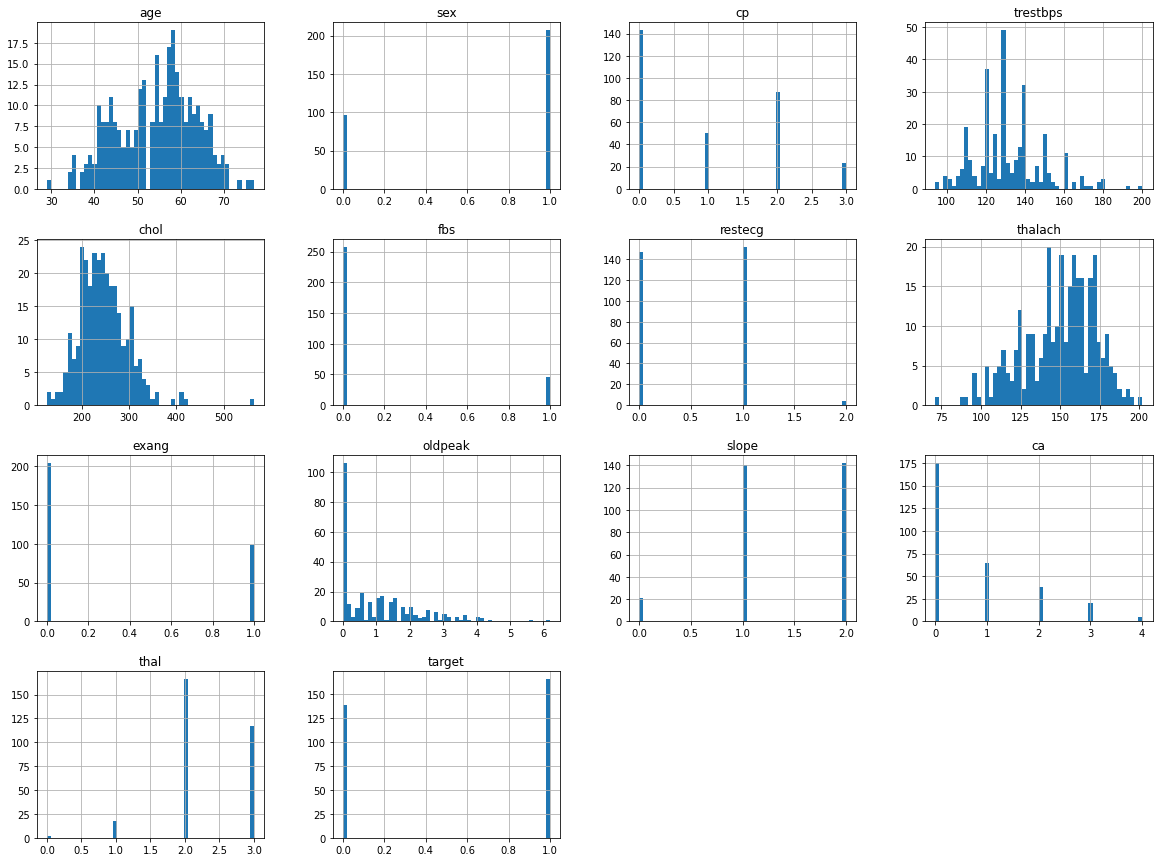

In [4]:
#see data distribution
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
# Compute pairwise correlation of columns

#print(df.corr())
corr_matrix = df.corr()
corr_matrix['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [6]:

import numpy as np

def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

df.corr(method=histogram_intersection)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.0,207.0,293.0,16473.0,16473.0,45.0,160.0,16473.0,99.0,315.0,424.0,221.0,701.0,165.0
sex,207.0,1.0,103.0,207.0,207.0,33.0,104.0,207.0,77.0,120.5,191.0,96.0,206.0,93.0
cp,293.0,103.0,1.0,293.0,293.0,27.0,92.0,293.0,19.0,105.3,208.0,64.0,272.0,126.0
trestbps,16473.0,207.0,293.0,1.0,39858.0,45.0,160.0,38198.0,99.0,315.0,424.0,221.0,701.0,165.0
chol,16473.0,207.0,293.0,39858.0,1.0,45.0,160.0,45227.0,99.0,315.0,424.0,221.0,701.0,165.0
fbs,45.0,33.0,27.0,45.0,45.0,1.0,19.0,45.0,16.0,27.4,39.0,25.0,44.0,23.0
restecg,160.0,104.0,92.0,160.0,160.0,19.0,1.0,160.0,45.0,85.1,147.0,59.0,158.0,97.0
thalach,16473.0,207.0,293.0,38198.0,45227.0,45.0,160.0,1.0,99.0,315.0,424.0,221.0,701.0,165.0
exang,99.0,77.0,19.0,99.0,99.0,16.0,45.0,99.0,1.0,72.2,90.0,55.0,98.0,23.0
oldpeak,315.0,120.5,105.3,315.0,315.0,27.4,85.1,315.0,72.2,1.0,162.7,119.0,273.0,66.2


<AxesSubplot:xlabel='restecg', ylabel='slope'>

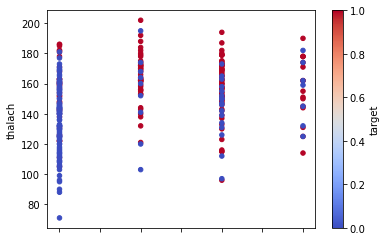

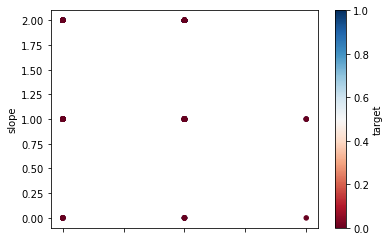

In [7]:
df.plot(kind='scatter',x='cp',y='thalach',c='target', cmap='coolwarm')
df.plot(kind='scatter',x='restecg',y='slope',c='target', cmap='RdBu')


In [8]:
#check NaN or null
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Data Wrangling


## split features and target

In [9]:
labels = df.iloc[:, -1]
features = df.iloc[:, :-1]
print(labels.shape, features.shape)

(303,) (303, 13)


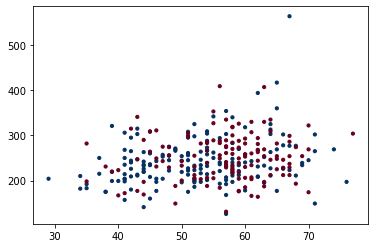

In [10]:
plt.scatter(features['age'], features['chol'], c=labels, s=10, cmap='RdBu')

## preprocess dataset

categorical features: one-hot-encoding
numerical features: MinMaxScaler

In [11]:
#one-hot-encoding of categorical features

#preprocess data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
numeric_features = ['age', 'trestbps','chol','thalach','oldpeak',]

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_features = ['sex', 'cp', 'fbs', 'restecg','exang','slope','ca','thal']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)],
        remainder='passthrough')
X=preprocessor.fit(features)
X=preprocessor.transform(features)
#X

In [12]:
print(type(labels))
y = labels.to_numpy()
print(X.shape, y.shape)

<class 'pandas.core.series.Series'>
(303, 30) (303,)


In [13]:
print(type(X))
print(type(y))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Model

## Trial-1 
model: logistic regression classifier

### Trial-1-1
model: logistic regression classifier

data is split with 30 % test_size

In [14]:
#logistic - split data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.3)

print("The training split: ", len(X_train), len(y_train))
print("The testing split: ", len(X_test), len(y_test))

The training split:  212 212
The testing split:  91 91


In [15]:
# logistic - fit model and predict using test dataset

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# make predictions
y_pred=logreg.predict(X_test)

#print(y_pred)
#print(logreg.classes_)
print(logreg.n_iter_)
#print(logreg.intercept_)

#print(logreg.coef_.shape)
#print(logreg.coef_)

logreg.get_params()

[32]


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [16]:
# logistic - analyze model - performance: accuracy, precision and recall

# import the metrics class
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


Accuracy: 0.8901098901098901
Precision: 0.8846153846153846
Recall: 0.92
F1: 0.9019607843137256


array([[35,  6],
       [ 4, 46]])

Text(0.5, 257.44, 'Predicted label')

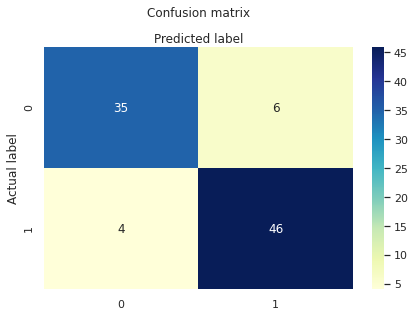

In [17]:
# logistic - performance: plot confusion matrix

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

class_names=[0,1] # name  of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

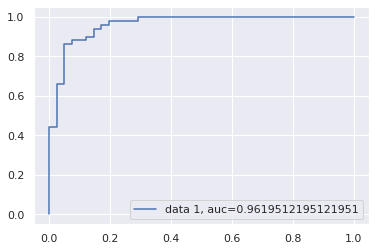

In [18]:
# logistic - performance: ROC and AUC

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Trial -1-2
model: logisticRegression
data is split with 40% test_size

[[0.09739486 0.90260514]
 [0.40334991 0.59665009]
 [0.29692355 0.70307645]
 [0.11120799 0.88879201]
 [0.89745308 0.10254692]]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.946
thresholds:
 [1.98169598 0.98169598 0.9447871  0.94093008 0.8808187  0.87666252
 0.84485238 0.84087976 0.80739912 0.80518296 0.71210043 0.70627811
 0.65116183 0.57050149 0.50567817 0.49776009 0.47593452 0.43861373
 0.41821564 0.36995174 0.35334055 0.3409454  0.31195714 0.19203907
 0.18344518 0.17100628 0.1670542  0.0110775 ]


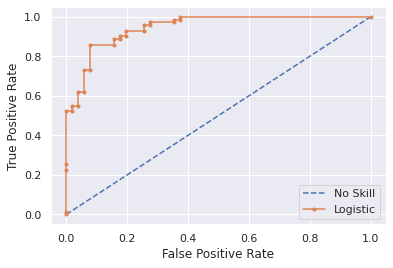

In [19]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.4, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)
print(lr_probs[:5, :])

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# summarize scores
print('\nNo Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, thresholds = roc_curve(testy, lr_probs)

#from sklearn.metrics import auc
#print("roc: ", lr_fpr, lr_tpr)
print("thresholds:\n",thresholds)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

### Trial -1-3 
model: logistic regression classifer with cross validation score

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

scores = cross_val_score(logreg, X, y, cv=7,scoring='f1')
scores

array([0.88      , 0.89795918, 0.91304348, 0.875     , 0.81818182,
       0.83333333, 0.84      ])

In [21]:
scores = cross_val_score(logreg, X, y, cv=7)
scores

array([0.86363636, 0.88636364, 0.90697674, 0.86046512, 0.81395349,
       0.81395349, 0.81395349])

### Trial-1-4
use pipeline, cross validation score, LogisticRegression

In [22]:
#from numpy import absolute

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


model = LogisticRegression(random_state=0)

# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',preprocessor), ('m', model)])

# define the model cross-validation configuration
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate the pipeline using cross validation and calculate MAE
scores = cross_val_score(model, X, y, scoring='f1', cv=cv)

# summarize the model performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

MAE: 0.854 (0.082)


## Trial-2
Model: SVC

### Trial-2-1 
feature dimensionality reduction: PCA; 
cross validate: yes;
model: SVC

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)

pca.fit(X)
reduced = pca.transform(X)
#print(pca.n_components_ )
pca.explained_variance_ratio_

array([0.23453654, 0.12458011, 0.10798087, 0.08556568, 0.07708494,
       0.06371964, 0.06163836, 0.05398828, 0.04192827, 0.03155722,
       0.02495527, 0.02175393, 0.01841254, 0.01711549, 0.00840836,
       0.00565186, 0.00491658, 0.00453297, 0.00383063])

In [24]:
reduced.shape

(303, 19)

In [25]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.svm import SVC
scoring = ['precision_macro', 'recall_macro']
clf = SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, reduced, y, scoring=scoring)
sorted(scores.keys())
#['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
#scores['test_recall_macro']

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [26]:
scores

{'fit_time': array([0.00147343, 0.00169778, 0.00149369, 0.00147486, 0.00141811]),
 'score_time': array([0.00133538, 0.00114727, 0.00113559, 0.00113273, 0.00113416]),
 'test_precision_macro': array([0.85666667, 0.86796537, 0.83548387, 0.87544066, 0.81318681]),
 'test_recall_macro': array([0.8474026 , 0.86796537, 0.83766234, 0.85858586, 0.78787879])}

### Trial-2-2 
feature dimensionality reduction: none
cross validate: yes
model: SVC

In [27]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.svm import SVC
scoring = ['precision_macro', 'recall_macro']
clf = SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, y, scoring=scoring)
#sorted(scores.keys())
scores

{'fit_time': array([0.00166726, 0.0015521 , 0.00153661, 0.00180888, 0.00150871]),
 'score_time': array([0.00126386, 0.00118804, 0.00118542, 0.00121975, 0.00121045]),
 'test_precision_macro': array([0.87725225, 0.8512931 , 0.82043011, 0.88888889, 0.81318681]),
 'test_recall_macro': array([0.86255411, 0.85281385, 0.82251082, 0.87710438, 0.78787879])}

PCA does not help in this dataset

### Trial-2-3 
feature dimensionality reduction: none
cross validate: no
model: SVC

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # "Support vector classifier"
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)

model = SVC()
model.fit(trainX, trainy)

model.get_params()
#model.coef_
#model.intercept_
#model.support_vectors_


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [29]:
ypred = model.predict(testX)

In [30]:
from sklearn import metrics
y_pred = ypred
y_test = testy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


Accuracy: 0.8901098901098901
Precision: 0.8846153846153846
Recall: 0.92
F1: 0.9019607843137256


array([[35,  6],
       [ 4, 46]])

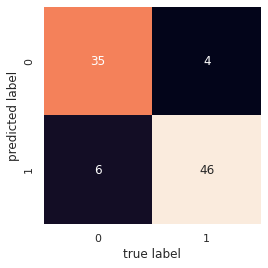

In [31]:
#validation
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

mat = confusion_matrix(testy, ypred)
sns.heatmap(mat.T, square=True, annot=True, 
            fmt='d', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label');

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # "Support vector classifier"
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)

model = SVC(probability=True)
model.fit(trainX, trainy)

model.get_params()
#model.coef_
#model.intercept_
#model.support_vectors_

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [33]:
ypred = model.predict(testX)

[[0.24518849 0.75481151]
 [0.5640146  0.4359854 ]
 [0.0870082  0.9129918 ]
 [0.08153452 0.91846548]
 [0.87198764 0.12801236]]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.942
auc:  0.942439024390244
thresholds:
 [1.98092591 0.98092591 0.96588947 0.96472255 0.89856675 0.88483864
 0.81223887 0.80844613 0.71083587 0.64188168 0.6118878  0.60335588
 0.53868763 0.51246273 0.5        0.30604127 0.28791954 0.22552435
 0.22542068 0.19383087 0.17374923 0.02754522]


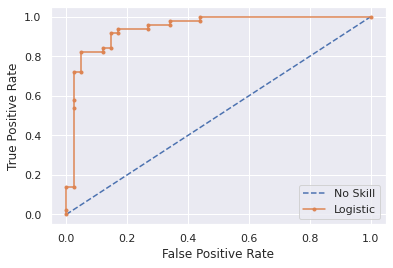

In [34]:
# roc curve and auc
from sklearn.datasets import make_classification

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# predict probabilities
lr_probs = model.predict_proba(testX)
print(lr_probs[:5, :])

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# summarize scores
print('\nNo Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, thresholds = roc_curve(testy, lr_probs)

from sklearn.metrics import auc
print("auc: ", auc(lr_fpr, lr_tpr))
print("thresholds:\n",thresholds)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

## Trial-3

Model: RandomForestClassifier


### Trial-3-1
model: RandomForestClassifier
cross validate: no

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [36]:
from sklearn import metrics
y_pred = ypred
y_test = ytest
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Accuracy: 0.8421052631578947
Precision: 0.8444444444444444
Recall: 0.8837209302325582
F1: 0.8636363636363636


array([[26,  7],
       [ 5, 38]])

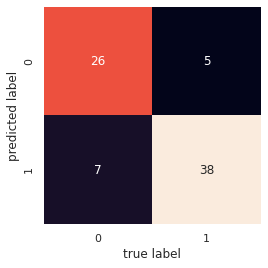

In [37]:
#validation
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

testy=ytest

mat = confusion_matrix(testy, ypred)
sns.heatmap(mat.T, square=True, annot=True, 
            fmt='d', cbar=False)
            #xticklabels=train.target_names, 
            #yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');


### Trial-3-2
model: RandomForestClassifier
cross validate: yes

In [38]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
scores = cross_validate(model, X, y, cv=5, scoring='f1',return_train_score=True)
print(scores)
#ypred = model.predict(Xtest)

{'fit_time': array([0.98238087, 0.97029877, 0.961622  , 1.03607917, 0.96017694]), 'score_time': array([0.06841779, 0.06586385, 0.0670588 , 0.0654242 , 0.06561589]), 'test_score': array([0.85294118, 0.90625   , 0.79365079, 0.86153846, 0.82352941]), 'train_score': array([1., 1., 1., 1., 1.])}


In [39]:
#from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print(scores)
#ypred = model.predict(Xtest)

[0.86956522 0.90625    0.80645161 0.84848485 0.8115942 ]


### Trial-4
Model: KNN

### Trial-4-1
model: KNN
GridSearch: no

In [40]:
#use KNN model
from sklearn.neighbors import KNeighborsClassifier

##use cross validation

from sklearn.model_selection import cross_val_score
scores_list = []
def KNN(X=features,y=labels):                                                                                         
    k_range = range(1, 26)
    scores = {}
    #scores_list = []

    for k in k_range:
        model = KNeighborsClassifier(n_neighbors=k)
        cv_scores = cross_val_score(model, X, y, cv=5)
        #print(cv_scores, cv_scores.mean())
        scores_list.append(cv_scores.mean())
    return scores_list

KNN(X,y)

[0.8053551912568306,
 0.7756284153005464,
 0.838360655737705,
 0.8348633879781422,
 0.8481420765027323,
 0.8284153005464481,
 0.8383060109289617,
 0.8481420765027323,
 0.838360655737705,
 0.8483060109289617,
 0.828360655737705,
 0.8349180327868853,
 0.8250273224043717,
 0.8283060109289618,
 0.828360655737705,
 0.8382513661202186,
 0.8316393442622949,
 0.8415846994535519,
 0.8481967213114755,
 0.8382513661202186,
 0.8316393442622951,
 0.8349180327868853,
 0.8282513661202184,
 0.8315846994535517,
 0.8281420765027322]

In [41]:
# use cross validation
from sklearn.model_selection import cross_val_score
#use KNN model
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 26)
scores = {}
scores_list = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(model, X, y, cv=5)
    #print(cv_scores, cv_scores.mean())
    scores_list.append(cv_scores.mean())
scores_list

[0.8053551912568306,
 0.7756284153005464,
 0.838360655737705,
 0.8348633879781422,
 0.8481420765027323,
 0.8284153005464481,
 0.8383060109289617,
 0.8481420765027323,
 0.838360655737705,
 0.8483060109289617,
 0.828360655737705,
 0.8349180327868853,
 0.8250273224043717,
 0.8283060109289618,
 0.828360655737705,
 0.8382513661202186,
 0.8316393442622949,
 0.8415846994535519,
 0.8481967213114755,
 0.8382513661202186,
 0.8316393442622951,
 0.8349180327868853,
 0.8282513661202184,
 0.8315846994535517,
 0.8281420765027322]

Text(0, 0.5, 'Testing Accuracy')

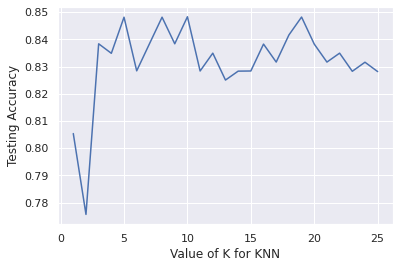

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

(25, 5)
(25, 5)


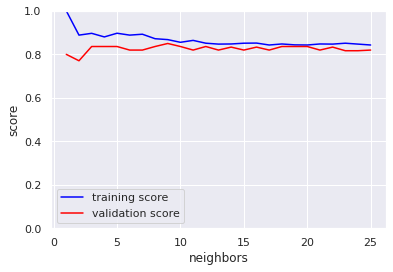

In [43]:
from sklearn.model_selection import validation_curve
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
neighbors = np.arange(1,26)
train_score, val_score = validation_curve(KNeighborsClassifier(), X, y,
                                param_name='n_neighbors', param_range=neighbors, cv=5)
print(train_score.shape)
print(val_score.shape)
plt.plot(neighbors, np.median(train_score, 1), color='blue', label='training score')
plt.plot(neighbors, np.median(val_score, 1), color='red', label='validation score')
#plt.plot(neighbors, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
#plt.plot(neighbors, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('neighbors')
plt.ylabel('score');

neighbor:  5 train lc:  0.9456213162072864  val lc:  0.7047453551912567
neighbor:  10 train lc:  0.9333393243937637  val lc:  0.6958950819672131
neighbor:  20 train lc:  0.9279324840824424  val lc:  0.6912590163934424
neighbor:  25 train lc:  0.9260486190709344  val lc:  0.683167213114754


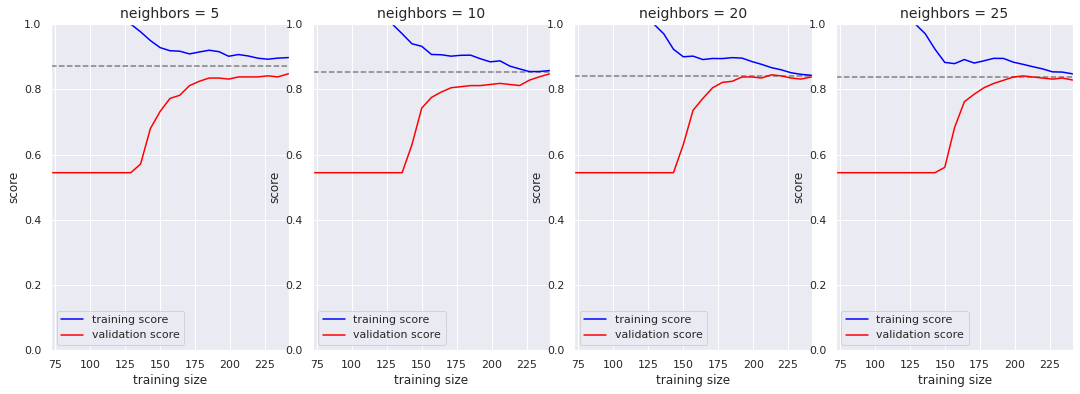

In [44]:
import matplotlib.pyplot as plt
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 4, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, neighbors in enumerate([5, 10, 20, 25]):
    N, train_lc, val_lc = learning_curve(KNeighborsClassifier(n_neighbors=neighbors),
                                         X, y, cv=5,
                                         train_sizes=np.linspace(0.3, 1, 25))
    print("neighbor: ", neighbors, "train lc: ",np.mean(train_lc), " val lc: ", np.mean(val_lc) )
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('neighbors = {0}'.format(neighbors), size=14)
    ax[i].legend(loc='best')

### Trial-4-2
model: KNN
GridSearch: yes

In [45]:
from sklearn.model_selection import GridSearchCV
k_range = range(1, 26)
param_grid = {'n_neighbors': range(1, 26)}
                           
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 26)})

In [46]:
grid.best_params_

{'n_neighbors': 10}

In [47]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
model = grid.best_estimator_

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

y_pred = model.fit(X_train, y_train).predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Accuracy: 0.8852459016393442
Precision: 0.8857142857142857
Recall: 0.9117647058823529
F1: 0.8985507246376812


array([[23,  4],
       [ 3, 31]])

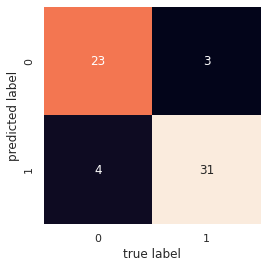

In [48]:
#validation
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

testy=y_test
ypred=y_pred

mat = confusion_matrix(testy, ypred)
sns.heatmap(mat.T, square=True, annot=True, 
            fmt='d', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label');

### Trial-4-3
run cross_val_score by using the best_estimator returned from GridSearch

In [49]:
from sklearn.model_selection import cross_val_score
model = grid.best_estimator_
cross_val_score(model, X, y, cv=5, scoring='f1')

array([0.84848485, 0.89230769, 0.79365079, 0.90909091, 0.85294118])

### Trial-4-4
model: KNN(n_neighbors=10)

In [50]:
#KNN 
#split training set and test set
#fit model and vaidate the model

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)
model = KNeighborsClassifier(n_neighbors=10)
scores_list = model.fit(X_train, y_train)
print(scores_list)

ypred = model.predict(X_test)
scores = accuracy_score(y_test, ypred)


KNeighborsClassifier(n_neighbors=10)


In [51]:
scores

0.8461538461538461

In [52]:
from sklearn import metrics
y_pred = ypred
y_test = y_test
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Accuracy: 0.8461538461538461
Precision: 0.8235294117647058
Recall: 0.8936170212765957
F1: 0.8571428571428571


array([[35,  9],
       [ 5, 42]])

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.83        44
           1       0.82      0.89      0.86        47

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.85        91
weighted avg       0.85      0.85      0.85        91



## Trial-5

model: SVC

### SVC with kernel rbf

In [54]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=0.95, whiten=True, svd_solver='full')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [55]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=42)

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1.07 s, sys: 60 ms, total: 1.13 s
Wall time: 284 ms
{'svc__C': 5, 'svc__gamma': 0.0005}


In [57]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit))


              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.83      0.85      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



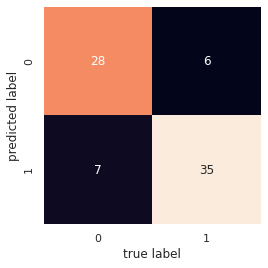

In [59]:
from sklearn.metrics import confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
            
plt.xlabel('true label')
plt.ylabel('predicted label');